# Baseball case study

### Problem statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

Our goal is to predict the total number of wins in the game based on certain features

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/EvaluationProjects/Baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### EDA

In [4]:
#renaming the columns
df = df.set_axis(['Number of predicted wins','Runs','At Bats','Hits','Doubles','Triples','Homeruns','Walks','Strikeouts','Stolen Bases',\
                  'Runs Allowed','Earned Runs','Earned Run Average (ERA)','Complete Games','Shoutouts','Saves','Errors'], axis=1)

In [5]:
#finding the shape of the dataset
df.shape

(30, 17)

In [6]:
# finding any null values present

df.isnull().sum()

Number of predicted wins    0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Games              0
Shoutouts                   0
Saves                       0
Errors                      0
dtype: int64

In [7]:
df.head()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shoutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
# finding datatypes

df.dtypes

Number of predicted wins      int64
Runs                          int64
At Bats                       int64
Hits                          int64
Doubles                       int64
Triples                       int64
Homeruns                      int64
Walks                         int64
Strikeouts                    int64
Stolen Bases                  int64
Runs Allowed                  int64
Earned Runs                   int64
Earned Run Average (ERA)    float64
Complete Games                int64
Shoutouts                     int64
Saves                         int64
Errors                        int64
dtype: object

In [9]:
# finding skewness

df.skew()

Number of predicted wins    0.047089
Runs                        1.200786
At Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
Complete Games              0.736845
Shoutouts                   0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

In [10]:
#Finding different statistical parameters

df.describe()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shoutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Key Insights:
1. For continuous type of features, we wont be checking the unique,value_counts,duplicates
2. we have the dataset of the shape (30, 17)
3. we dont have null values in any of the columns
4. All the mean values are very close to median. so chance of skewness present is less
5. All columns are of type int except one column which is float
6. This is a Regression problem where in we have to predict the Number of wins based on analysis of all of the features we got in the dataset

### Visualisation of dataset

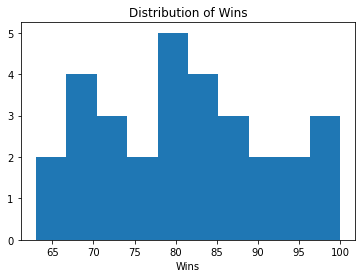

In [11]:
# Plotting distribution of wins

plt.hist(df['Number of predicted wins'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

Among 30 entries in the dataset,we have 5 records having highest number of predicted wins

### Univariate Analysis

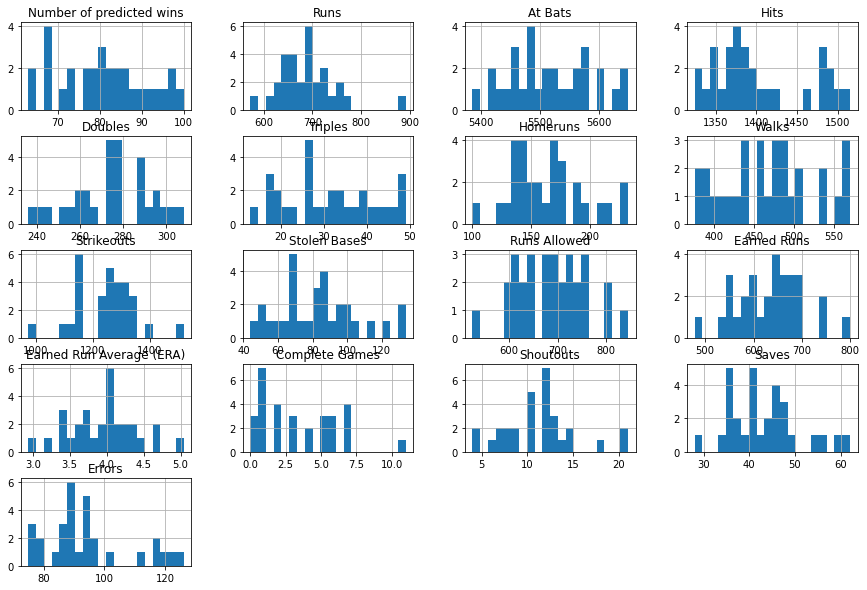

In [12]:
# plotting histplots

df.hist(bins=20,figsize=(15,10))
plt.show()


###### we have columns which are right skewed so we will treat them with power transformation later

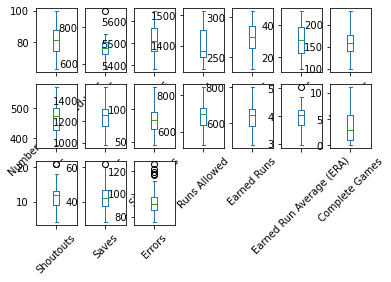

In [13]:
# Plotting boxplot

df.plot(kind='box',subplots=True,layout=( 3,7),rot=45)
plt.show()

###### Looks like we have Outliers in the column Error. we will have closer look into each of the columns

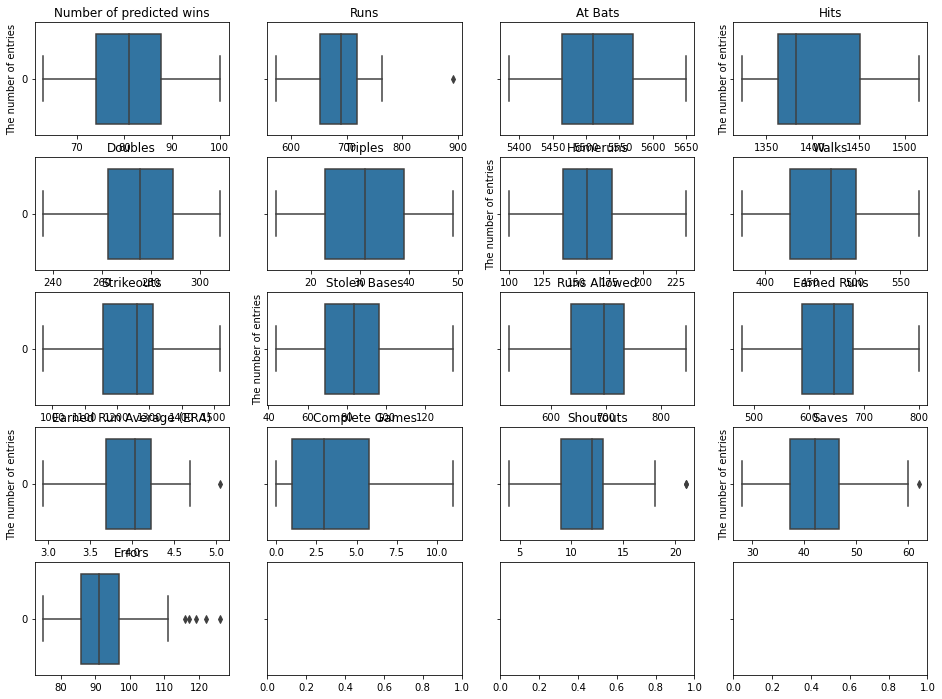

In [14]:
# we will look in detail & check for outliers

def boxplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=df.columns, rows=5, cols=4, subtitle='Boxplots before deleting outliers')

###### We have Outliers in the Errors, Saves,Shoutouts,ERA columns. So we will treat it in later steps

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


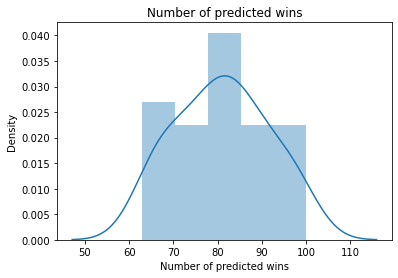

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


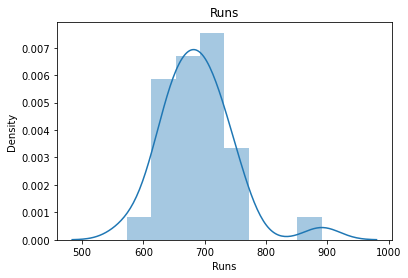

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


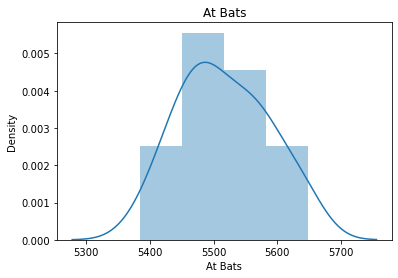

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


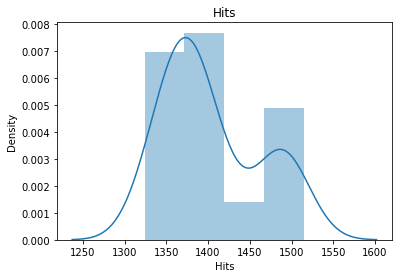

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


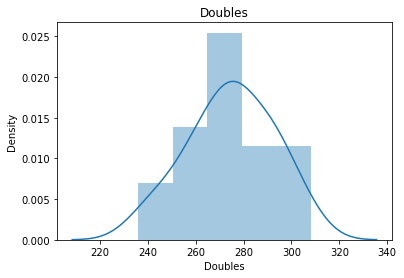

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


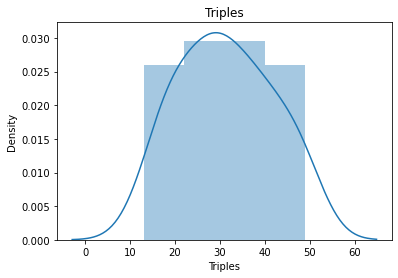

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


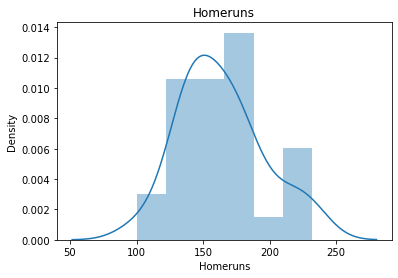

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


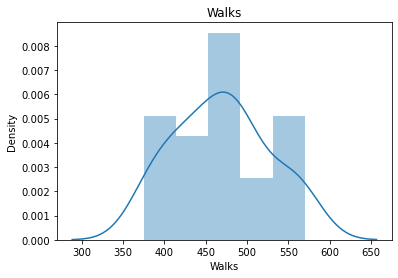

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


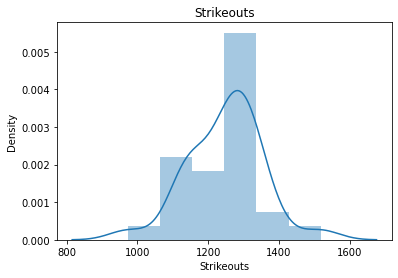

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


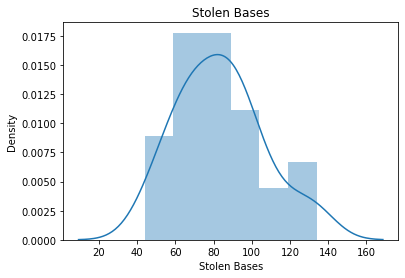

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


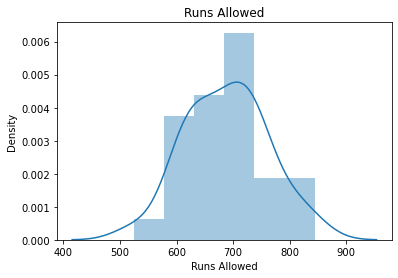

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


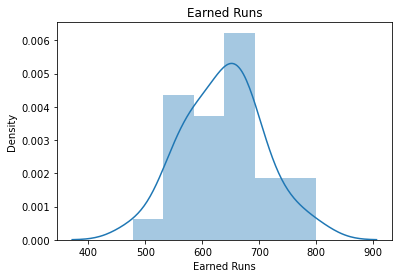

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


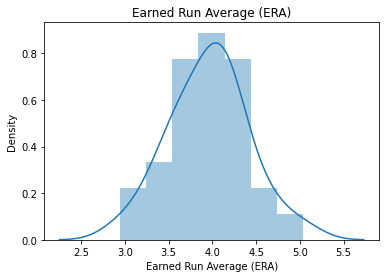

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


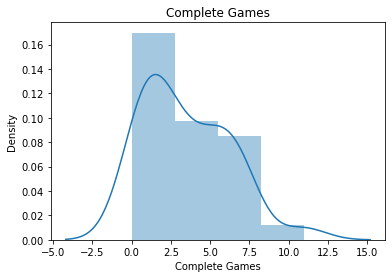

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


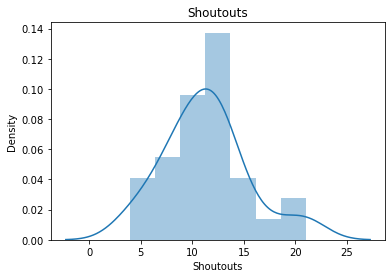

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


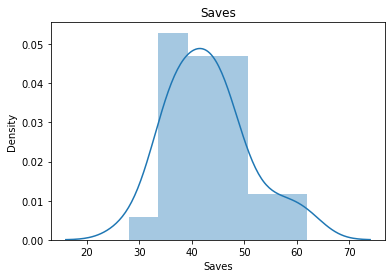

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


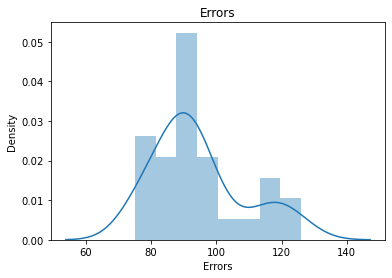

In [15]:
# Plotting distribution plots
for i in df.columns:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

###### Most of all the features are normally distributed.so if there is some Right skewness it will be treated in further steps

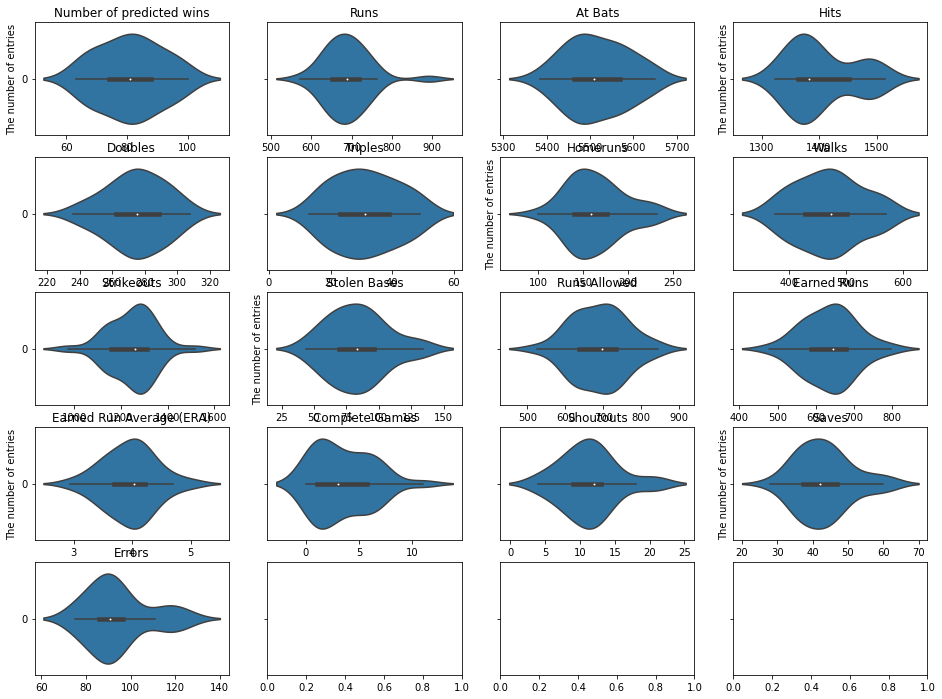

In [16]:
# we will look at violin plot to find the Highs and Lows of certain features

def boxplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.violinplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=df.columns, rows=5, cols=4, subtitle='Violinplots before deleting outliers')

1. Majority of the Runs ranges at 800

### Bivariate Analysis

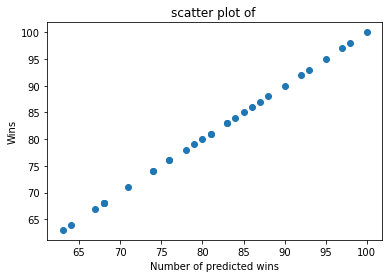

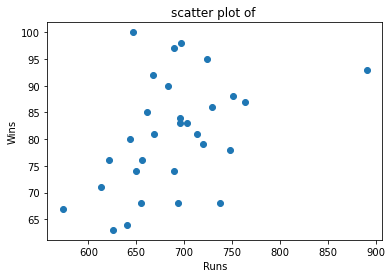

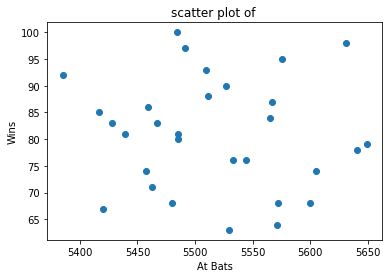

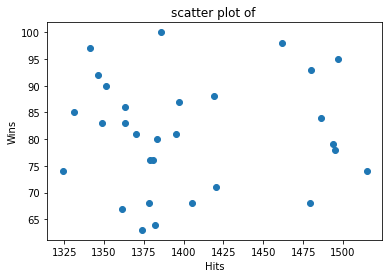

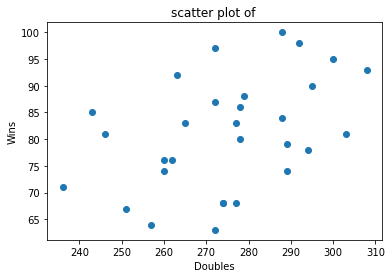

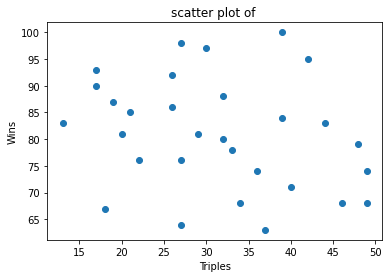

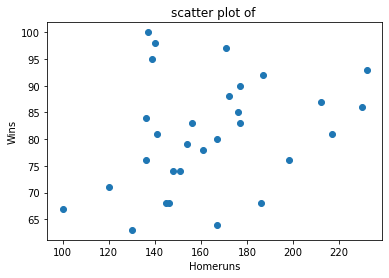

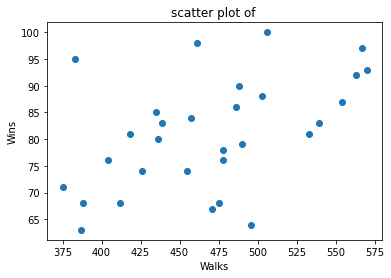

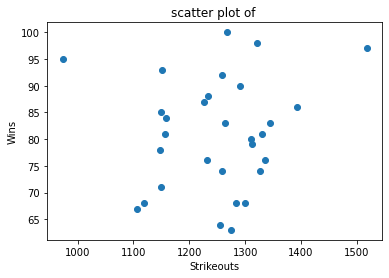

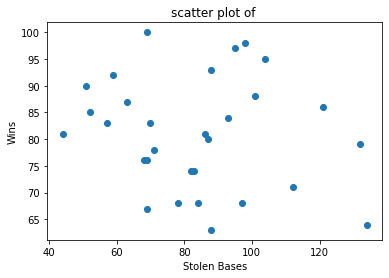

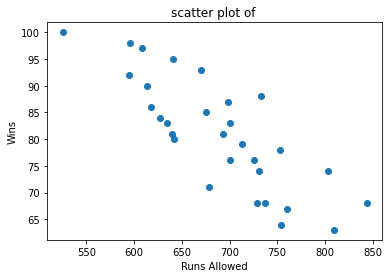

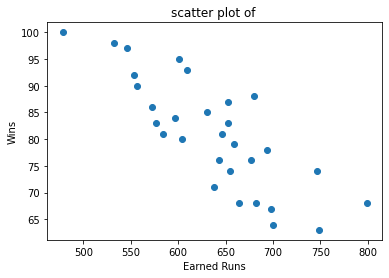

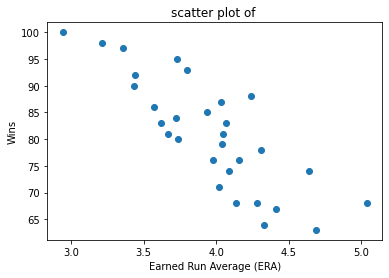

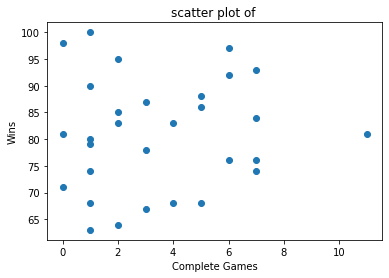

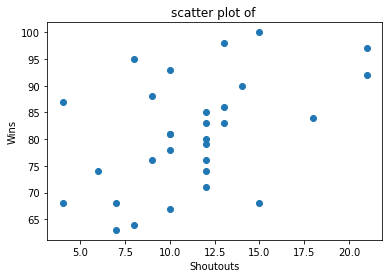

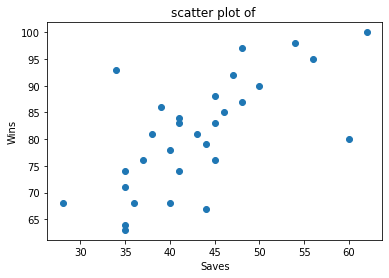

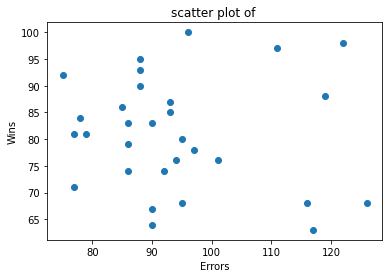

In [17]:
# plotting scatterplot
for i in df.columns:
    plt.scatter(df[i], df['Number of predicted wins']) #c=df['win_bins']
    plt.title("scatter plot of ")
    plt.xlabel(i)
    plt.ylabel('Wins')

    plt.show()

Conclusion from above scatter plot
1. saves,shoutouts,strikeouts,walks,Homeruns,Runs are positively related to the target variable & hence increase in value of any of these will increase the Number of Wins
2. Runs Allowed,Earned Runs,ERA,Errors are negetively related to target variable. Hence if these values are low then Number of wins is more

### MultiVariate Analysis

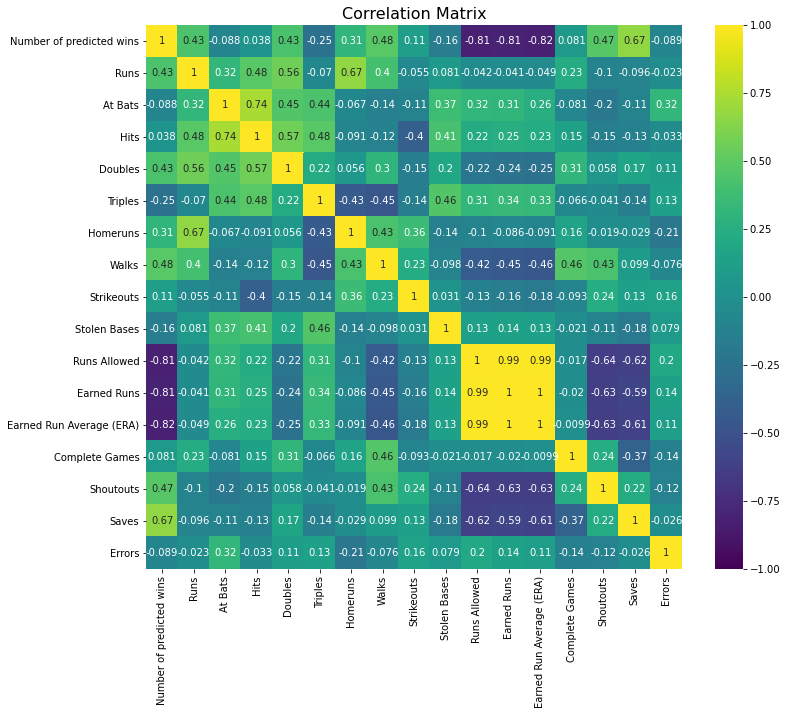

In [18]:
figh, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_title('Correlation Matrix', fontsize=16)

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True)
plt.show()

###### Observations:
1. Runs Allowed has got high correlation with Earned Runs and Earned Run Average, so Runs earned is positively dependent on Runs allowed. meaning, that if Earned runs decreases Number of predicted wins decreases
2. Saves,Shoutouts,Walks are positively correlated with target variable. so as these increases in value Number of Wins also increases
3. Saves and shoutouts will reduce the Earned Runs & ERA.

#### Removing Outliers using zscore

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [20]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [21]:
z[5][1]

3.5096470447193067

In [22]:
df=df[(z<3).all(axis=1)]
df.shape

(29, 17)

In [23]:
x=df.drop('Number of predicted wins',axis=1)
y=df['Number of predicted wins']
cols=x.columns

#### Removing skewness

In [24]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


### Data Modelling

In [25]:
# importing all the required libraries of models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [26]:
# creating instances of models
models = [('lr',LinearRegression()),('ridge',Ridge()),('lasso',Lasso()),('rfr',RandomForestRegressor()),
         ('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet()),('xgb',XGBRegressor())]

#### Scaling & Normalization

In [37]:
# split the input & output into Train & test Splits
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.3,random_state=106)   
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# Y_test = sc.fit_transform(Y_test)
# Y_train = sc.fit_transform(Y_train)

#### Scaling using RobustScaler & MinMaxScaler

In [28]:
normalize = MinMaxScaler()
robust = RobustScaler(quantile_range = (0.1,0.8)) #range of interquartile is one of the parameters
robust_stan_train = robust.fit_transform(X_train)
robust_stan_test = robust.fit_transform(X_test)
robust_stan_normalize_train= normalize.fit_transform(robust_stan_train)
robust_stan_normalize_test = normalize.fit_transform(robust_stan_test)

# also normalized the dataset using MinMaxScaler i.e has bought the data set between (0,1)

df_robust_normalize_train = pd.DataFrame(robust_stan_normalize_train,columns=cols)
df_robust_normalize_test = pd.DataFrame(robust_stan_normalize_test,columns=cols)
df_robust_normalize_train.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shoutouts,Saves,Errors
0,0.903728,0.0,0.0,0.578391,0.586825,0.539654,0.699551,0.263486,0.725421,0.736882,0.748292,0.744848,0.668644,0.373171,0.613222,0.930371
1,0.633406,0.0,0.0,0.115930,0.234491,0.906007,0.252601,0.504400,0.000000,0.597200,0.623601,0.636735,0.000000,0.435918,0.556566,0.076613
2,0.076022,0.0,0.0,0.469460,0.721450,0.117129,0.072587,0.362675,0.596883,1.000000,1.000000,1.000000,0.230279,0.237960,0.294447,0.908281
3,1.000000,0.0,0.0,0.469460,0.202657,0.868607,0.941108,0.249165,0.298954,0.614708,0.645638,0.625341,0.495369,0.000000,0.692885,0.530613
4,0.517792,0.0,0.0,0.546644,0.901169,0.389998,0.368941,0.338269,0.390798,0.621708,0.649310,0.648127,0.380801,0.553751,0.613222,0.361169


### Model Selection

In [29]:
#function to return best score of individual models
def model_selection(md,model):
    best_score=0
    for i in range(201):
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(robust_stan_normalize_train, Y_train, test_size = 0.3, random_state = i)
        
        md = model
        md.fit(x_train,y_train)
        b_score=md.score(x_test,y_test)
        pred_ls = md.predict(x_test)
        b_score
        if b_score>best_score:
            best_score=b_score
            random_state=i
    print("Best Score for model ",model," is = {} For Random state = {}".format(best_score*100,random_state))

In [30]:
for i,j in models:
    model_selection(i,j)

Best Score for model  LinearRegression()  is = 60.002716147823264 For Random state = 184
Best Score for model  Ridge()  is = 89.82169255801364 For Random state = 169
Best Score for model  Lasso()  is = 60.11428253415403 For Random state = 153
Best Score for model  RandomForestRegressor()  is = 85.97781249999998 For Random state = 102
Best Score for model  BaggingRegressor()  is = 84.82595693779906 For Random state = 169
Best Score for model  GradientBoostingRegressor()  is = 91.24482942523342 For Random state = 35
Best Score for model  ElasticNet()  is = 42.87006970225787 For Random state = 41
Best Score for model  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constrai

In [31]:
# defining parameters for RidgeRegressor

parameter_rd ={ 'alpha':[1.0,0.01,0.1],
    'max_iter':[None,1,2],
    'tol':[0.001,0.01,0.1],
    'solver':['auto','sqrt'],
    'random_state':[None,0,30,42]
    
}

parameter_rnd={'n_estimators':[100,150,200],
    'criterion':['mse','mae','gini','entropy'],
    'max_depth':[None,1,2],
    'min_samples_split':[2,1],
    'min_samples_leaf':[1,2],
    'min_weight_fraction_leaf':[0.0,0.1],
    'max_features':['auto','sqrt']
              }



### Hyper-parameter tuning

In [32]:
def model_parameter_tuning(x,y,model,parameters,cross_folds):
    model_grid = GridSearchCV(model,
                        parameters,
                        n_jobs=-1,
                        cv = cross_folds,
                        verbose=True)
    model_grid.fit(x,y)
    y_predicted = model_grid.predict(x)
    print(model_grid.score)
    print(model_grid.best_params_)
    print("The RMSE score is",np.sqrt(np.mean((y-y_predicted)**2)))

In [33]:
model_parameter_tuning(robust_stan_normalize_train,Y_train,Ridge(),parameter_rd,10)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.1], 'max_iter': [None, 1, 2],
                         'random_state': [None, 0, 30, 42],
                         'solver': ['auto', 'sqrt'],
                         'tol': [0.001, 0.01, 0.1]},
             verbose=True)>
{'alpha': 1.0, 'max_iter': None, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
The RMSE score is 3.5804116965584654


#### Using Ridge Regression

In [34]:
# we will use the outcome of robustscaler to predict the outcome

ridge=Ridge(alpha=1.0, max_iter= None,random_state= None,solver= 'auto',tol= 0.001)
ridge.fit(robust_stan_normalize_train,Y_train)
y_pred_ridge=ridge.predict(robust_stan_normalize_test)

In [35]:
# finding the different metrics of the model

print("R2_score is :",r2_score(Y_test,y_pred_ridge))
print("RMSE score is :",mean_squared_error(Y_test,y_pred_ridge))
print("MAE score is :",mean_absolute_error(Y_test,y_pred_ridge))

R2_score is : 0.6864932582626831
RMSE score is : 37.90722257500347
MAE score is : 5.134683452736714


#### Using RandomForestRegression

In [38]:
model_parameter_tuning(robust_stan_normalize_train,Y_train,RandomForestRegressor(),parameter_rnd,10)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'gini', 'entropy'],
                         'max_depth': [None, 1, 2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1],
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'n_estimators': [100, 150, 200]},
             verbose=True)>
{'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}
The RMSE score is 2.019483844946525


In [39]:
rnd=RandomForestRegressor(criterion='mse', max_depth= None, max_features='auto',min_samples_leaf= 1,min_samples_split= 2,min_weight_fraction_leaf= 0.1, n_estimators=100,random_state=42)
rnd.fit(robust_stan_normalize_train,Y_train)
y_pred_rnd=rnd.predict(robust_stan_normalize_test)

In [40]:
print("R2_score is :",r2_score(Y_test,y_pred_rnd))
print("RMSE score is :",mean_squared_error(Y_test,y_pred_rnd))
print("MAE score is :",mean_absolute_error(Y_test,y_pred_rnd))

R2_score is : 0.7940213431359474
RMSE score is : 24.9056168558831
MAE score is : 3.702878306878306


#### Using XGBRegressor

In [41]:
xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None,random_state=44)
xgb.fit(robust_stan_normalize_train,Y_train)
y_pred_xgb=xgb.predict(robust_stan_normalize_test)

In [42]:
print("R2_score is :",r2_score(Y_test,y_pred_xgb))
print("MSE score is :",mean_squared_error(Y_test,y_pred_xgb))
print("MAE score is :",mean_absolute_error(Y_test,y_pred_xgb))

R2_score is : 0.7041092049282036
MSE score is : 35.77721539423672
MAE score is : 4.221590677897136


#### Reg-plot for RandomForestRegressor

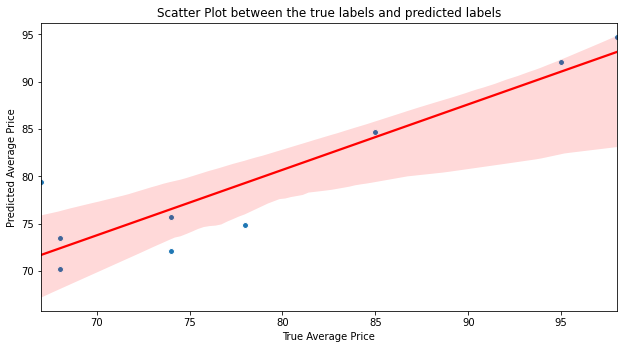

In [43]:
fig = plt.figure(figsize = (10, 5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.scatterplot(Y_test,y_pred_rnd, linewidth = 1, ax = axes)
sns.regplot(Y_test,y_pred_rnd,data=df, scatter=False, color="Red")
plt.title('Scatter Plot between the true labels and predicted labels')
axes.set_xlabel("True Average Price")
axes.set_ylabel("Predicted Average Price")
plt.show()

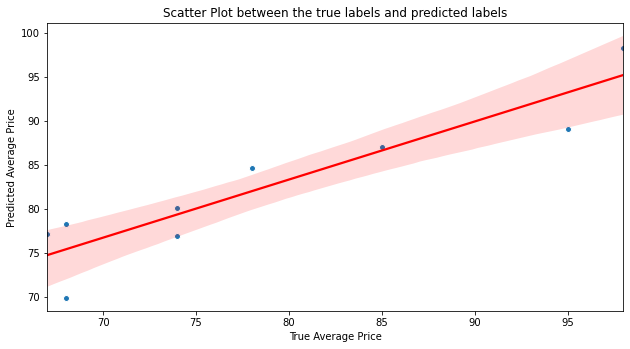

In [44]:
fig = plt.figure(figsize = (10, 5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.scatterplot(Y_test,y_pred_ridge, linewidth = 1, ax = axes)
sns.regplot(Y_test,y_pred_ridge,data=df, scatter=False, color="Red")
plt.title('Scatter Plot between the true labels and predicted labels')
axes.set_xlabel("True Average Price")
axes.set_ylabel("Predicted Average Price")
plt.show()

In [55]:
import pickle
filename = 'Baseball.pkl'
pickle.dump(rnd, open(filename, 'wb'))

In [56]:
loaded_model = pickle.load(open('Baseball.pkl', 'rb'))
result = loaded_model.score(robust_stan_normalize_test, Y_test)
print(result*100)

79.40213431359474


In [57]:
conclusion=pd.DataFrame([loaded_model.predict(robust_stan_normalize_test)[:],Y_test[:]],index=["Predicted","Original"])

In [58]:
conclusion = conclusion.astype(int)

In [59]:
conclusion

,0,1,2,3,4,5,6,7,8
Predicted,74,70,73,79,92,94,84,75,72
Original,78,68,68,67,95,98,85,74,74


#### We got moderately high accuracy score of about 79.4 using RandomForestRegressor. so after prediction of number of wins,we found that most of the predicted values coincides with the actual values.Hence the datapoints in the Regression plot are nearer to each other. we can improve the model performance by improving r2_score.